# Sea Level Pridictor

<i>Mean sea level (MSL, often shortened to sea level) is an average surface level of one or more among Earth's coastal bodies of water from which heights such as elevation may be measured. <br>
When sea levels rise as rapidly as they have been, even a small increase can have devastating effects on coastal habitats farther inland, it can cause destructive erosion, wetland flooding, aquifer and agricultural soil contamination with salt, and lost habitat for fish, birds, and plants.

We will analyze a dataset of the global average sea level change since 1880, and use the data to predict the sea level change through year 2050.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Have a look of the dataset.

In [2]:
df = pd.read_csv("epa-sea-level.csv", index_col="Year")
df.head()

,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
Year,,,,
1880,0.000000,-0.952756,0.952756,NaN
1881,0.220472,-0.732283,1.173228,NaN
1882,-0.440945,-1.346457,0.464567,NaN
1883,-0.232283,-1.129921,0.665354,NaN
1884,0.590551,-0.283465,1.464567,NaN


##### Let's create a scatter plot to se the CSIRO Adjusted Sea Level over years.

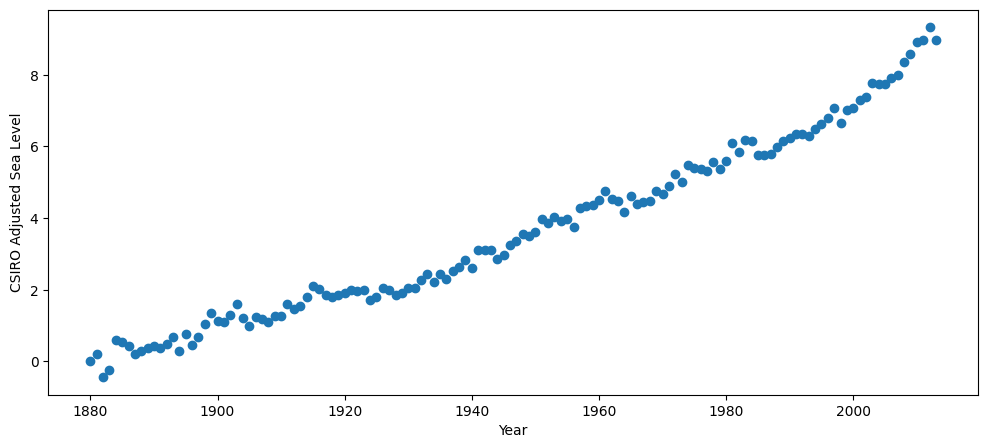

In [3]:
fig = plt.figure(figsize=(12,5))

plt.scatter(df["CSIRO Adjusted Sea Level"].index, df["CSIRO Adjusted Sea Level"].values)
plt.xlabel("Year")
plt.ylabel("CSIRO Adjusted Sea Level")

plt.show()

<i> From the data accumulated since 1980, the average sea level has kept raising till now.

##### Next, we will use a line regress line to create an equation to predict the average sea level till 2050.

First, create a liner regression model from collected data.

In [7]:
res = stats.linregress(df["CSIRO Adjusted Sea Level"].index, df["CSIRO Adjusted Sea Level"].values)

Preparing data for the line.

In [8]:
x = np.arange(1880, 2050)
y = res.intercept + res.slope * x

Plot the line with previous scatter plot.

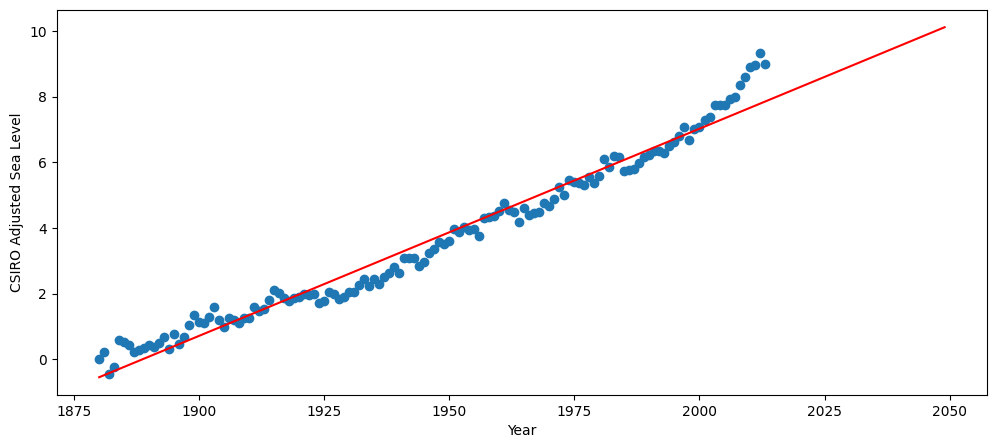

In [10]:
fig = plt.figure(figsize=(12,5))

plt.scatter(df["CSIRO Adjusted Sea Level"].index, df["CSIRO Adjusted Sea Level"].values)
plt.plot(x,y, color="red")

plt.xlabel("Year")
plt.ylabel("CSIRO Adjusted Sea Level")

plt.show()

As the line plot, the average sea level will increase till 2050

<i> Because of global warming, the sea level since the 20s has risen faster than the previous time.<br> So, let's create another liner regress that use recent data to predict how sea level would change.

Preparing data for new line.

In [14]:
df_new = df.copy()
df_best_fit2 = df_new.loc[2000:]
res2 = stats.linregress(df_best_fit2.index, df_best_fit2["CSIRO Adjusted Sea Level"].values)
x_new = np.arange(2000,2051)
y_new = res2.intercept + res2.slope * x_new 

Let's create the final plot line with sea level predictor.

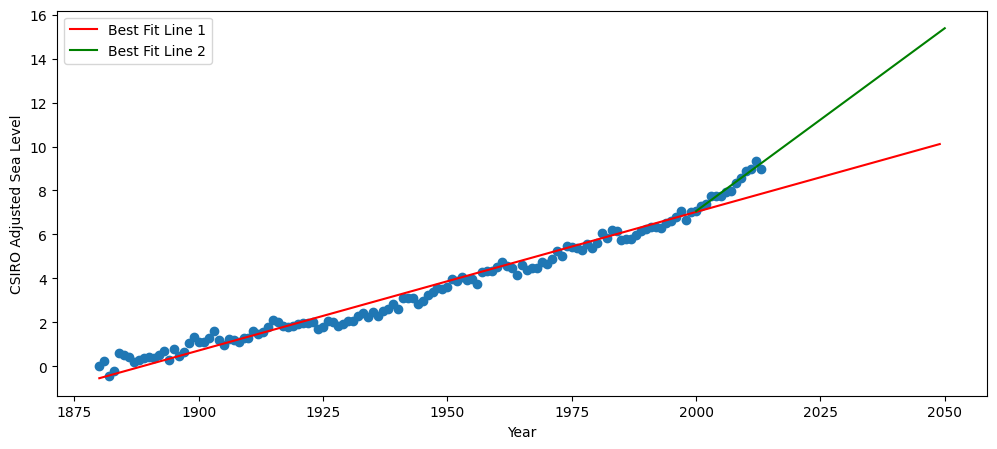

In [20]:
fig = plt.figure(figsize=(12,5))

plt.plot(x,y, color="red")
plt.plot(x_new,y_new,"green")
plt.scatter(df["CSIRO Adjusted Sea Level"].index, df["CSIRO Adjusted Sea Level"].values)

plt.xlabel("Year")
plt.ylabel("CSIRO Adjusted Sea Level")
plt.legend(["Best Fit Line 1", "Best Fit Line 2"])

plt.show()

<i> As the line shows the sea level has kept increasing dramatically in recent years since 2010. <br>If humans don't have a sustainable solution, it might have a large impact on human being.